In [12]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Dataset
df = pd.read_csv('cleaned_data.csv')
df

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

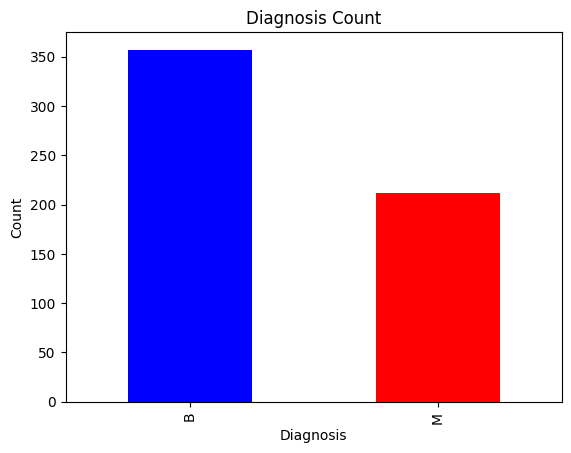

In [5]:
# Bar Plot
df['diagnosis'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

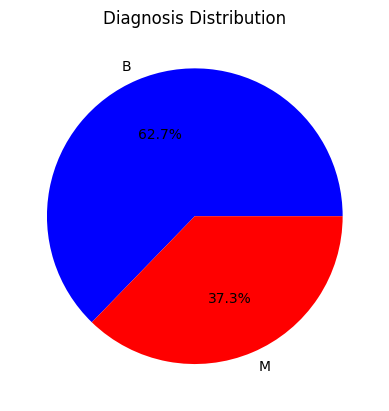

In [6]:
# Pie Chart
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Diagnosis Distribution')
plt.ylabel('')  # Hide ylabel
plt.show()

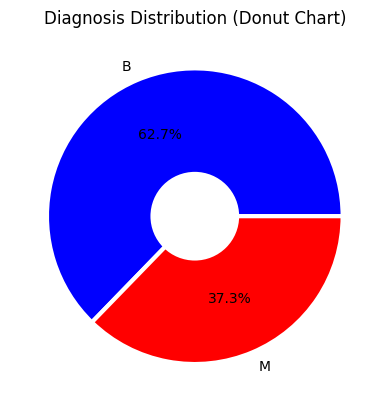

In [8]:
# Donut Chart
plt.pie(df['diagnosis'].value_counts(), labels=df['diagnosis'].value_counts().index, 
        autopct='%1.1f%%', colors=['blue', 'red'], wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0, 0), 0.3, fc='white'))  # Create hole
plt.title('Diagnosis Distribution (Donut Chart)')
plt.show()

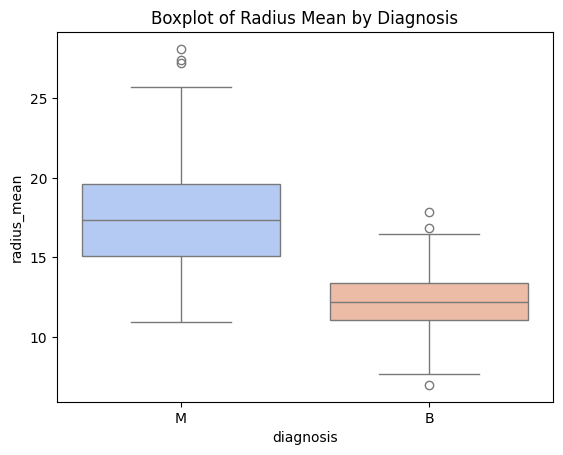

In [13]:
# Box Chart
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette="coolwarm")
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

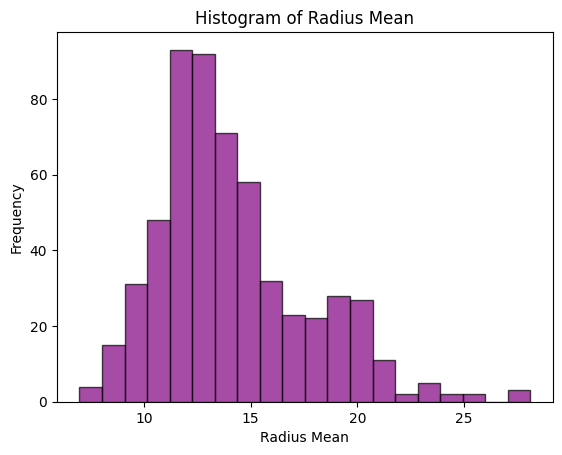

In [15]:
# Histogram Garph
plt.hist(df['radius_mean'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()


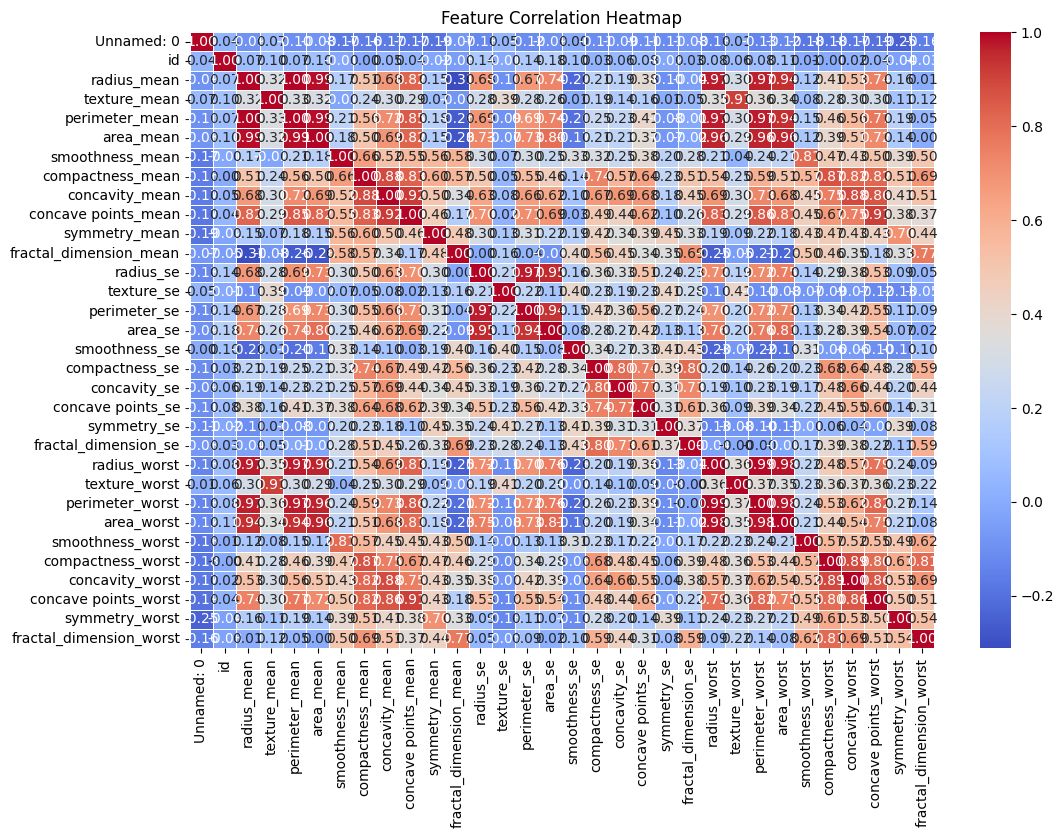

In [27]:
# Compute correlation matrix
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

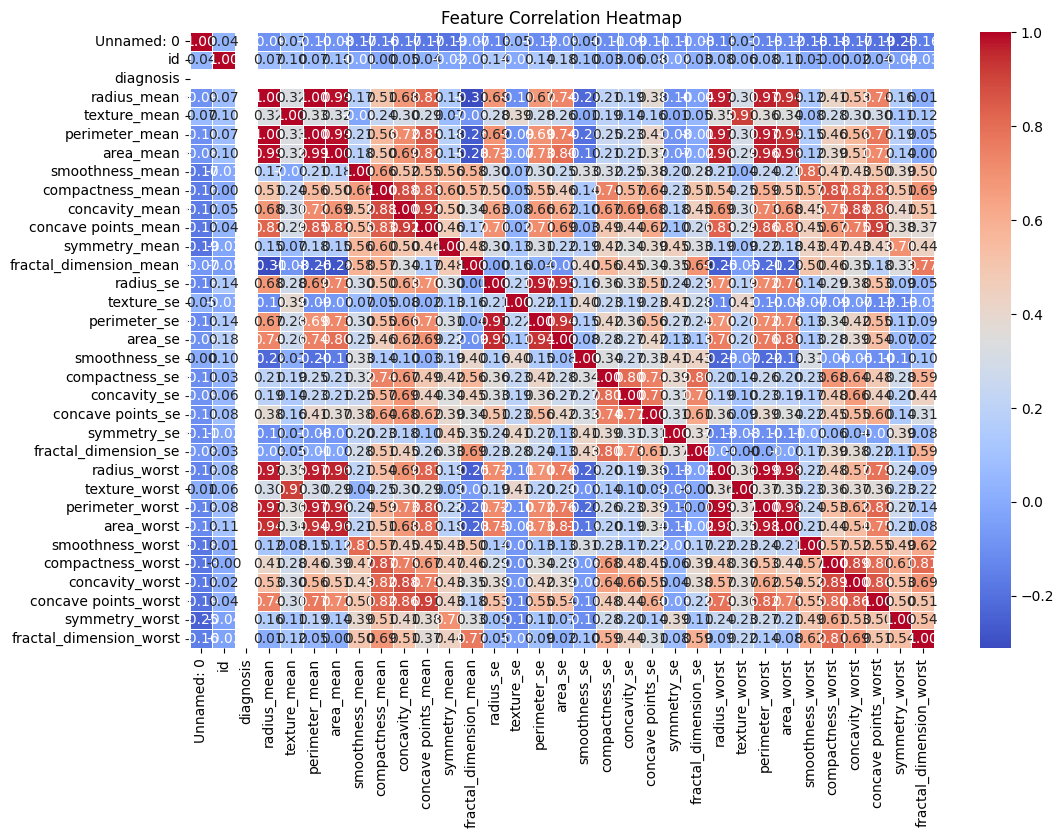

In [29]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Malignant = 1, Benign = 0
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

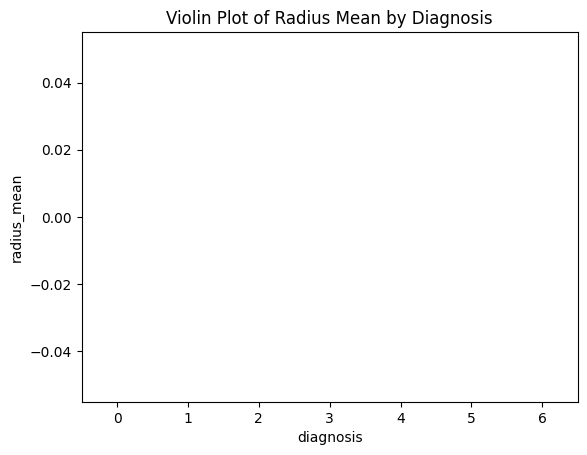

In [30]:
# Violin Plot
sns.violinplot(x='diagnosis', y='radius_mean', data=df, palette='coolwarm')
plt.title('Violin Plot of Radius Mean by Diagnosis')
plt.show()

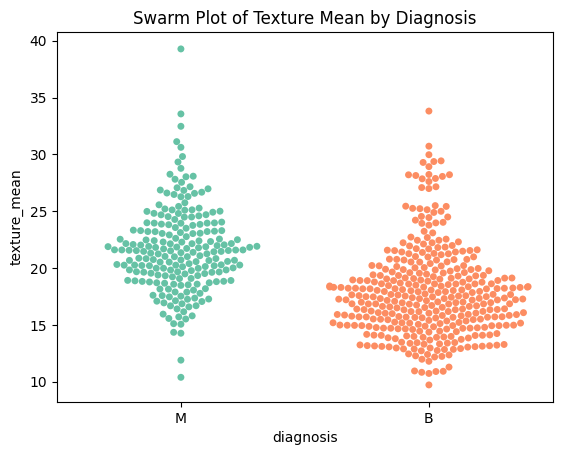

In [20]:
# Swarm Plot
sns.swarmplot(x='diagnosis', y='texture_mean', data=df, palette='Set2')
plt.title('Swarm Plot of Texture Mean by Diagnosis')
plt.show()

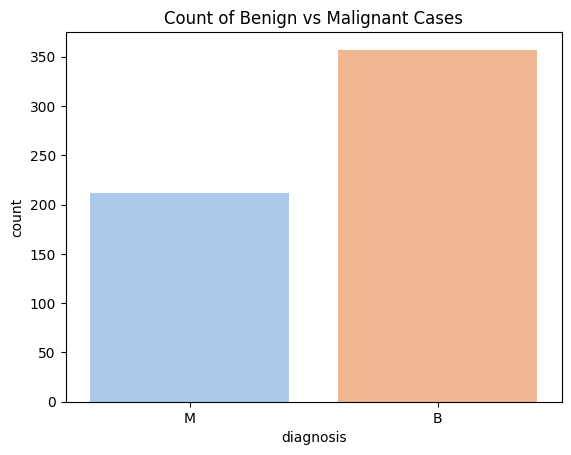

In [22]:
# Countplot
sns.countplot(x='diagnosis', data=df, palette='pastel')
plt.title('Count of Benign vs Malignant Cases')
plt.show()

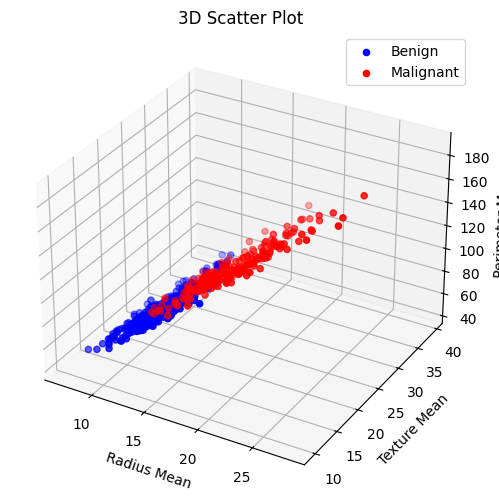

In [23]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[df['diagnosis'] == 'B']['radius_mean'], 
           df[df['diagnosis'] == 'B']['texture_mean'], 
           df[df['diagnosis'] == 'B']['perimeter_mean'], c='blue', label='Benign')

ax.scatter(df[df['diagnosis'] == 'M']['radius_mean'], 
           df[df['diagnosis'] == 'M']['texture_mean'], 
           df[df['diagnosis'] == 'M']['perimeter_mean'], c='red', label='Malignant')

ax.set_xlabel('Radius Mean')
ax.set_ylabel('Texture Mean')
ax.set_zlabel('Perimeter Mean')
ax.set_title('3D Scatter Plot')
ax.legend()
plt.show()

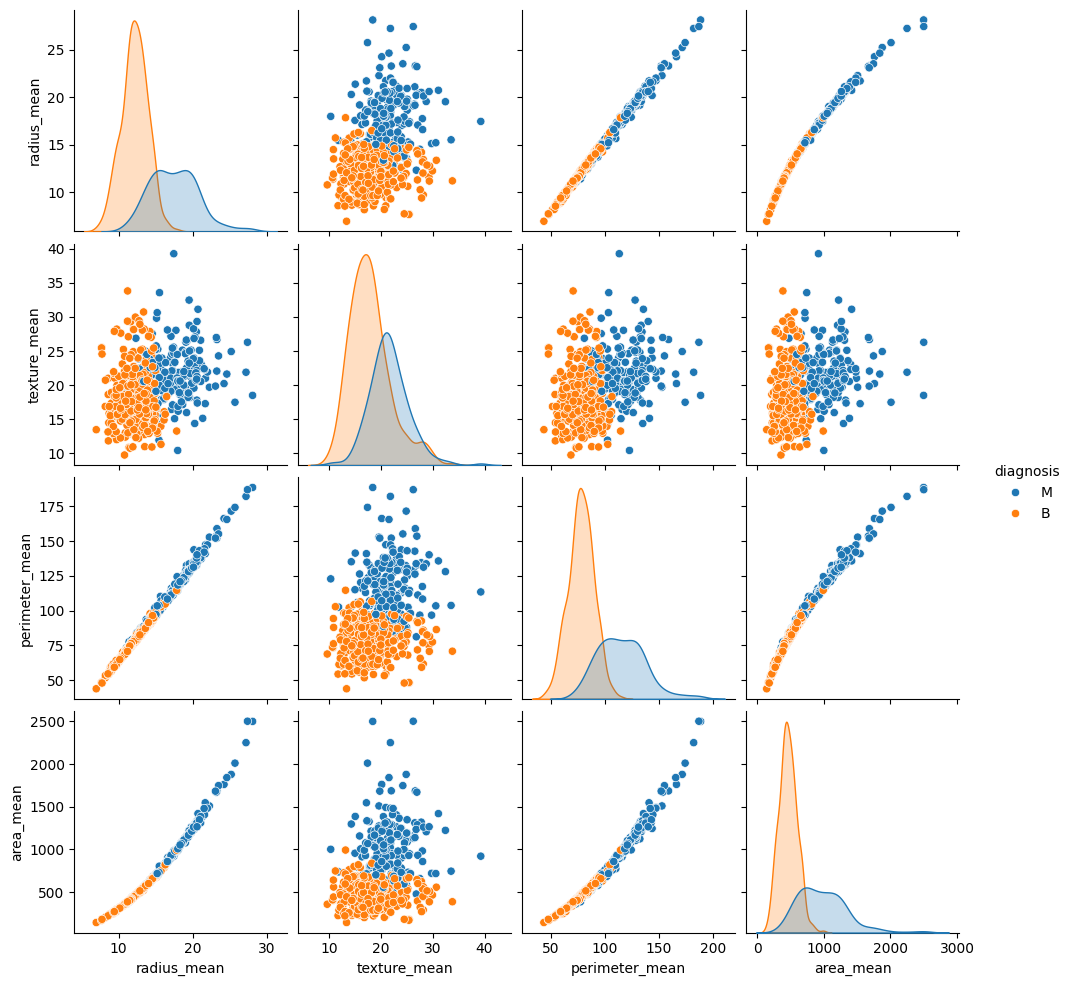

In [26]:
# PairPlot Graph
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()